<a href="https://colab.research.google.com/github/wlrma0108/Stand_Alone_Deeplearning/blob/main/stand_Alone%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

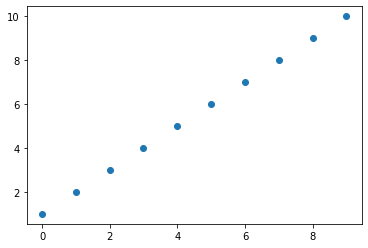

In [3]:
x=[0,1,2,3,4,5,6,7,8,9]
y=[1,2,3,4,5,6,7,8,9,10]
plt.scatter(x,y)
plt.show 

In [4]:
class H():
  def __init__(self,w):
    self.w=w

  def forward(self, x):
    return self.w *x

h=H(4)
pred_y=h.forward(5)
print('value of f(5):', pred_y)
print('value of w:',h.w)



value of f(5): 20
value of w: 4


In [18]:
def cost(h,x,y):
  error =0
  for i in range(len(x)):
    error+=(h.forward(x[i])-y[i])**2
  error =error/len(x)
  return error

h=H(4)
print('cost value when w =4:',cost(h,x,y))

cost value when w =4: 230.5


[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3548.5, 3237.625, 2941.0, 2658.625, 2390.5, 2136.625, 1897.0, 1671.625, 1460.5, 1263.625, 1081.0, 912.625, 758.5, 618.625, 493.0, 381.625, 284.5, 201.625, 133.0, 78.625, 38.5, 12.625, 1.0, 3.625, 20.5, 51.625, 97.0, 156.625, 230.5, 318.625, 421.0, 537.625, 668.5, 813.625, 973.0, 1146.625, 1334.5, 1536.625, 1753.0, 1983.625]


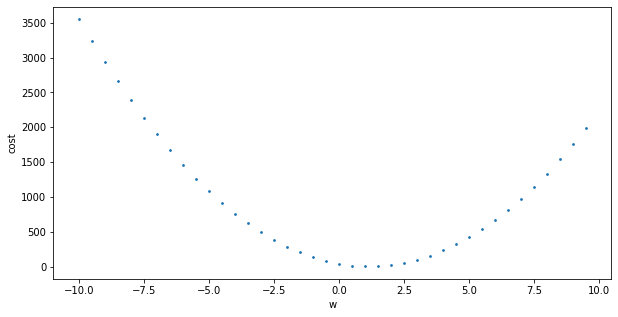

In [10]:
list_w=[]
list_c=[]
for i in range(-20,20):
  w= i*0.5
  h=H(w)
  c= cost(h,x,y)
  list_w.append(w)
  list_c.append(c)

print(list_w)
print(list_c)

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c,s=3)



1.3861997149999126 1.960069001424999 1.3861997149999126 1.960069001424999
1.3731860462448107 1.7750488995259524 1.3731860462448107 1.7750488995259524
1.360914156608771 1.6105199589321522 1.360914156608771 1.6105199589321522
1.3493417646819759 1.4642127630383786 1.3493417646819759 1.4642127630383786
1.3384289990950413 1.3341092353969866 1.3384289990950413 1.3341092353969866
1.3281382611465706 1.2184148035458078 1.3281382611465706 1.2184148035458078
1.3184340952611548 1.1155336457166984 1.3184340952611548 1.1155336457166984
1.3092830668312225 1.0240466789982778 1.3092830668312225 1.0240466789982778
1.3006536470217642 0.9426919853310486 1.3006536470217642 0.9426919853310486
1.292516104141482 0.87034740534192 1.292516104141482 0.87034740534192
1.2848424012053759 0.8060150599314881 1.2848424012053759 0.8060150599314881
1.2776060993366243 0.7488075861076238 1.2776060993366243 0.7488075861076238
1.270782266674396 0.6979358972172203 1.270782266674396 0.6979358972172203
1.2643473924739177 0.652

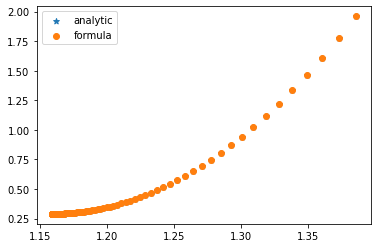

In [21]:
def cal_grad(w,cost):
  h=H(w)
  cost1= cost(h,x,y)
  eps=0.00001
  h=H(w+eps)
  cost2=cost(h,x,y)
  dcost=cost2-cost1
  dw=eps
  grad=dcost/dw
  return grad, (cost1+cost2)*0.5


def cal_grad2(w,cost):
  h=H(w)
  grad=0
  for i in range(len(x)):
    grad+=2*(h.forward(x[i])-y[i])*x[i]
  grad= grad/len(x)
  c= cost(h,x,y)
  return grad, c

w1=1.4
w2=1.4
lr=0.001

list_w1=[]
list_w2=[]
list_s1=[]
list_s2=[]

for i in range(100):
  grad,mean_cost=cal_grad(w1, cost)
  grad2,mean_cost2=cal_grad(w2,cost)

  w1-=lr*grad
  w2-=lr*grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_s1.append(mean_cost)
  list_s2.append(mean_cost2)
  print(w1,mean_cost,w2,mean_cost2)



print("Final LOSS")
print(w1,mean_cost,w2,mean_cost2)
plt.scatter(list_w1,list_s1,label='analytic',marker='*')
plt.scatter(list_w2,list_s2,label="formula")
plt.legend()

1.1578897368422645 0.2894736849230263 1.157889736842176 0.2894736849230263


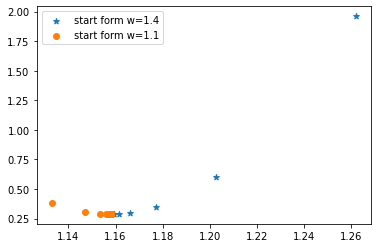

In [24]:
w1=1.4
w2=1.1
lr=0.01

list_w1=[]
list_w2=[]
list_c1=[]
list_c2=[]

for i in range(100):
  grad, mean_cost=cal_grad(w1,cost)
  grad2,mean_cost2=cal_grad(w2,cost)

  w1-=lr*grad
  w2-=lr*grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)

print(w1,mean_cost,w2,mean_cost2)
plt.scatter(list_w1,list_c1,label='start form w=1.4' ,marker='*')
plt.scatter(list_w2,list_c2,label='start form w=1.1')
plt.legend()